# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

from unityagents import UnityEnvironment
import random
import copy
import torch
import numpy as np

from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg_agent import MADDPG


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. Agent training

Episode 100	Average Score: 0.005	Max Average Score: 0.011
Episode 200	Average Score: 0.003	Max Average Score: 0.007
Episode 300	Average Score: 0.008	Max Average Score: 0.008
Episode 400	Average Score: 0.003	Max Average Score: 0.009
Episode 500	Average Score: 0.000	Max Average Score: 0.003
Episode 600	Average Score: 0.008	Max Average Score: 0.008
Episode 700	Average Score: 0.008	Max Average Score: 0.011
Episode 800	Average Score: 0.005	Max Average Score: 0.010
Episode 900	Average Score: 0.010	Max Average Score: 0.010
Episode 1000	Average Score: 0.046	Max Average Score: 0.046
Episode 1100	Average Score: 0.070	Max Average Score: 0.070
Episode 1200	Average Score: 0.101	Max Average Score: 0.101
Episode 1300	Average Score: 0.094	Max Average Score: 0.101
Episode 1400	Average Score: 0.161	Max Average Score: 0.162
Episode 1500	Average Score: 0.131	Max Average Score: 0.166
Episode 1600	Average Score: 0.243	Max Average Score: 0.243
Episode 1700	Average Score: 0.256	Max Average Score: 0.301
Episod

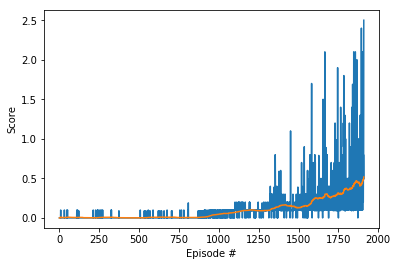

In [6]:
 maddpgagent = MADDPG(state_size,action_size,num_agents,0) 

def train_mddpg(n_episodes=5000):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores = []
    noise = 2.0
    

    for i_episode in range(1, n_episodes+1):                                    
        env_info = env.reset(train_mode=True)[brain_name]         # reset the environment 
        states = env_info.vector_observations                     # get the current state
        maddpgagent.reset()                                       # reset the agent
        score = np.zeros(num_agents)                                # init the score
        if i_episode > 1000:                                      # Reduce noise lvl after exploration phase
            noise =1.0
        
        while True: 
            actions = maddpgagent.act(states,noise)                # send action to the environment
            env_info = env.step(actions)[brain_name]               # get next state              
            next_states = env_info.vector_observations
            rewards = env_info.rewards         
            dones = env_info.local_done                         
            maddpgagent.step(states, actions, rewards, next_states, dones)       # agent takes step to train     
            states = next_states                                                 # Update vars
            score += rewards  
            if any(dones):                                    # exit loop if episode finished                             
                break

        score_max = np.max(score)
        scores.append(score_max)
        scores_deque.append(score_max)
        avg_scores.append(np.mean(scores_deque))

        if i_episode % 100 == 0:
             print('\rEpisode {}\tAverage Score: {:.3f}\tMax Average Score: {:.3f}'.format(i_episode, np.mean(scores_deque), np.max(avg_scores[-100:])))
       
        print('\rEpisode {}\tAverage Score: {:.3f}\tScore: {:.3f}'.format(i_episode, np.mean(scores_deque), scores[-1]), end="")
        
        if avg_scores[-1] >= 0.5:
            maddpgagent.store_agents()
            print("\rSolved in episode: {} \tAverage score: {:.3f}".format(i_episode , avg_scores[-1]))
            break
    return scores , avg_scores


scores , avg_scores = train_mddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()